#1. File upload

model_name = 'res10_300x300_ssd_iter_140000.caffemodel'

prototxt_name = 'deploy.prototxt.txt'

file_name = 'obama_01.mp4'

In [ ]:
from google.colab import files
files.upload()

Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel
Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.mp4 to obama_01.mp4


In [ ]:
!ls -al

total 19336
drwxr-xr-x 1 root root     4096 Jul 16 12:13 .
drwxr-xr-x 1 root root     4096 Jul 16 12:12 ..
drwxr-xr-x 4 root root     4096 Jul 14 13:37 .config
-rw-r--r-- 1 root root    28092 Jul 16 12:13 deploy.prototxt.txt
-rw-r--r-- 1 root root  9083585 Jul 16 12:13 obama_01.mp4
-rw-r--r-- 1 root root 10666211 Jul 16 12:13 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Jul 14 13:37 sample_data


#2. Load FIle

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_01.mp4'

In [ ]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

#3. DNN Model

In [ ]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [ ]:
def detectAndDisplay(frame):
    IPython.display.clear_output(wait=True)
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    model.setInput(blob)
    detections = model.forward()
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability)
        confidence = detections[0, 0, i, 2]
        if confidence > min_confidence:
            (height, width) = frame.shape[:2]
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = box.astype('int')
            print(confidence, startX, startY, endX, endY)
            text = '{:.2f}%'.format(confidence*100)
            y = startY - 10 if startY -10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
    # Show the output
    cv2_imshow(frame)

0.9971015 154 38 235 151
0.9705089 454 41 556 181


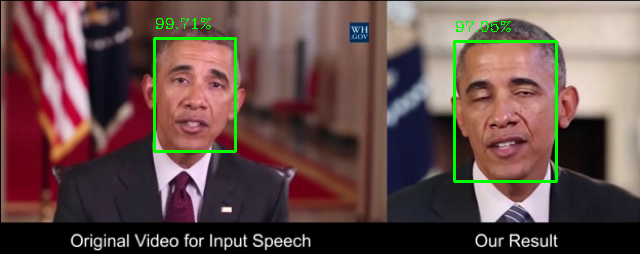

--(!) No captured frame -- Break!


In [ ]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)

if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)